In [1]:
# Pacotes necessários para a análise exploratória
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path

In [2]:
 # Função para plotagem dos mapas de correlação
def plot_heatmap(height, data):
    plt.figure(figsize=(height,height*0.75))
    return sns.heatmap(data.corr(), vmin=-1, center=0, vmax=1)

In [3]:
try:
    data_path = os.path.join(os.path.dirname(os.path.realpath('__file__')),'data.csv')
    my_abs_path = Path(data_path).resolve(strict=True)
except FileNotFoundError:
    data=pd.read_csv('http://www.aneel.gov.br/dados/relatorios?p_p_id=dadosabertos_WAR_dadosabertosportlet&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_resource_id=gerarGeracaoFonteCSV&p_p_cacheability=cacheLevelPage&p_p_col_id=column-2&p_p_col_count=1')
    data.to_csv(data_path)
else:
    data=pd.read_csv(data_path)

In [4]:
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento
0,0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00
1,1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00
2,2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00
3,3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00
4,4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00


In [5]:
data['competencia'] = pd.to_datetime((data.anoReferencia*10000+data.mesReferencia*100+1).apply(str),format='%Y%m%d')
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00,2000-01-01
1,1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00,2001-01-01
2,2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00,2002-01-01
3,3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00,2003-01-01
4,4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00,2004-01-01


In [6]:
data[data['nomFonteGeracao'] == 'Biomassas'].sort_values(by=['competencia']).head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,0,1,Biomassas,0.0000,1,2000,13/09/2017 00:00:00,2000-01-01
69,69,70,Biomassas,0.0000,2,2000,13/09/2017 00:00:00,2000-02-01
87,87,88,Biomassas,0.0000,3,2000,13/09/2017 00:00:00,2000-03-01
105,105,106,Biomassas,358.8856,4,2000,13/09/2017 00:00:00,2000-04-01
122,122,123,Biomassas,0.0000,5,2000,13/09/2017 00:00:00,2000-05-01


In [8]:
print(set(data['nomFonteGeracao']))

{'Energia produzida fora do SIN', 'Nuclear', 'Eolicas', 'Itaipu', 'Oleo Diesel / Combustivel', 'Carvao', 'Hidreletricas exclusive Itaipu', 'Gas Natural', 'Residuos Processos Industriais', 'Biomassas'}


In [9]:
#data = data.sort_values(by=['competencia'])
#data = data.reset_index(drop=True)
#data.head()

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
data['FonteGeracao'] = label_encoder.fit_transform(data['nomFonteGeracao'])
data_onehot = pd.get_dummies(data['FonteGeracao']).rename(index=str, columns={0: "is_biomass", 1: "is_coal", 2: "is_outSIN", 3:"is_eolic", 4:"is_natGas", 5:"is_hidrelectric", 6:"is_itaipu", 7:"is_nuclear", 8:"is_oil", 9:"is_residual"})
data_onehot.head()

,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [11]:
data_onehot.head()

,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [12]:
data.reset_index(drop=True, inplace=True)
data_onehot.reset_index(drop=True, inplace=True)
data = pd.concat([data, data_onehot], axis=1)
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia,FonteGeracao,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00,2000-01-01,0,1,0,0,0,0,0,0,0,0,0
1,1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00,2001-01-01,0,1,0,0,0,0,0,0,0,0,0
2,2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00,2002-01-01,0,1,0,0,0,0,0,0,0,0,0
3,3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00,2003-01-01,0,1,0,0,0,0,0,0,0,0,0
4,4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00,2004-01-01,0,1,0,0,0,0,0,0,0,0,0


In [13]:
data = data.sort_values(by=['competencia'])
data.reset_index(drop=True, inplace=True)
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia,FonteGeracao,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,0,1,Biomassas,0.000000,1,2000,13/09/2017 00:00:00,2000-01-01,0,1,0,0,0,0,0,0,0,0,0
1,414,415,Energia produzida fora do SIN,NaN,1,2000,13/09/2017 00:00:00,2000-01-01,2,0,0,1,0,0,0,0,0,0,0
2,621,622,Eolicas,0.000000,1,2000,13/09/2017 00:00:00,2000-01-01,3,0,0,0,1,0,0,0,0,0,0
3,207,208,Carvao,772.954908,1,2000,13/09/2017 00:00:00,2000-01-01,1,0,1,0,0,0,0,0,0,0,0
4,1656,1657,Oleo Diesel / Combustivel,112.026593,1,2000,13/09/2017 00:00:00,2000-01-01,8,0,0,0,0,0,0,0,0,1,0


In [14]:
legend = data[['nomFonteGeracao','FonteGeracao']].tail(10).sort_values(by=['FonteGeracao'])
legend = legend.reset_index(drop=True)
legend

,nomFonteGeracao,FonteGeracao
0,Biomassas,0
1,Carvao,1
2,Energia produzida fora do SIN,2
3,Eolicas,3
4,Gas Natural,4
5,Hidreletricas exclusive Itaipu,5
6,Itaipu,6
7,Nuclear,7
8,Oleo Diesel / Combustivel,8
9,Residuos Processos Industriais,9


In [15]:
data = data.drop(columns=['Unnamed: 0','ideGeracaoFonte','nomFonteGeracao','dthProcessamento'])
data.head()

,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,competencia,FonteGeracao,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,0.000000,1,2000,2000-01-01,0,1,0,0,0,0,0,0,0,0,0
1,NaN,1,2000,2000-01-01,2,0,0,1,0,0,0,0,0,0,0
2,0.000000,1,2000,2000-01-01,3,0,0,0,1,0,0,0,0,0,0
3,772.954908,1,2000,2000-01-01,1,0,1,0,0,0,0,0,0,0,0
4,112.026593,1,2000,2000-01-01,8,0,0,0,0,0,0,0,0,1,0


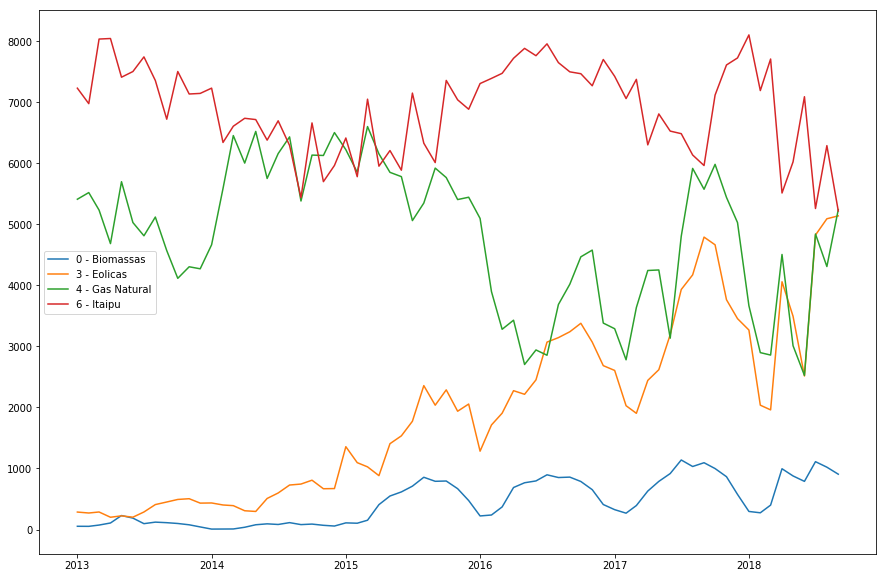

In [16]:
plt.figure(figsize=(15,10))
for index, row in legend.iterrows():
    if index not in [5,9,8,1,2,7]:
        plt.plot('competencia','mdaEnergiaDespachadaGWh',data=data[(data['FonteGeracao'] == index) & (data['anoReferencia'] > 2012)], label=str(index) + ' - ' + row.nomFonteGeracao)
plt.legend()

In [17]:
data['mdaEnergiaDespachadaGWh'] = data['mdaEnergiaDespachadaGWh'].fillna(0)

In [19]:
time_data = data[['competencia','mdaEnergiaDespachadaGWh']][(data['FonteGeracao'] == 1)]
time_data = time_data.set_index('competencia')
time_data.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='competencia', length=225, freq=None)

In [20]:
time_data.head()

,mdaEnergiaDespachadaGWh
competencia,
2000-01-01,772.954908
2000-02-01,726.482505
2000-03-01,685.798458
2000-04-01,0.000000
2000-05-01,725.874700


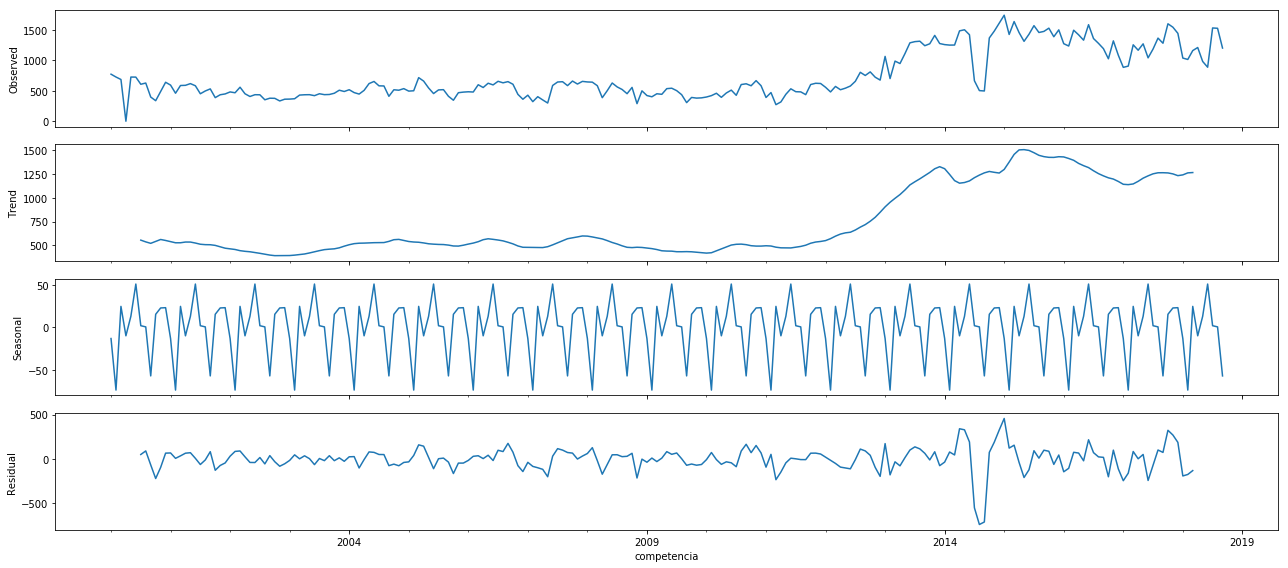

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(time_data, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
model = SARIMAX(time_data,
              order=(1, 1, 1),
              seasonal_order=(1, 1, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6791      0.043     15.699      0.000       0.594       0.764
ma.L1         -0.9359      0.026    -35.948      0.000      -0.987      -0.885
ar.S.L12      -0.4406      0.041    -10.631      0.000      -0.522      -0.359
sigma2       2.92e+04   1839.387     15.875      0.000    2.56e+04    3.28e+04


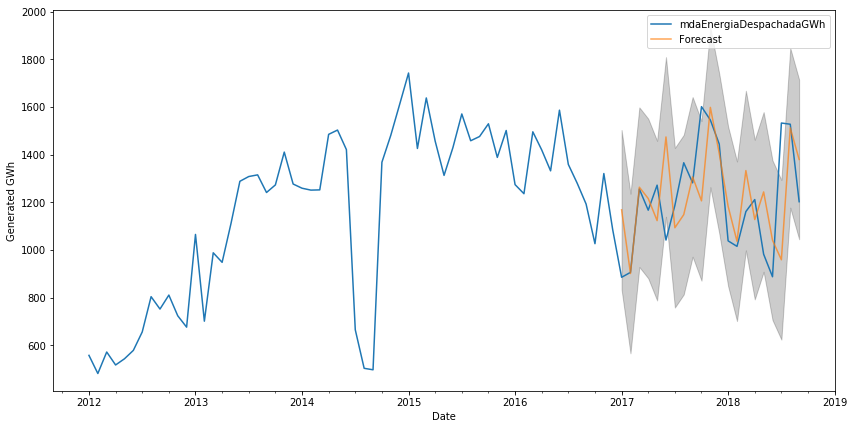

In [73]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = time_data['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Generated GWh')
plt.legend()
plt.show()

In [76]:
lineColors = pd.DataFrame(
    {'obs':['darkred','darkgreen','darkblue','darkgreen','darkblue','darkred','darkviolet','darkred','darkred','darkred'],
     'pred':['red','green','red','lime','blue','red','violet','red','red','red']})

# Predict Time Series data and returns a graph
def plot_predict(index,steps=72,show_ci=False):
    time_data = data[['competencia','mdaEnergiaDespachadaGWh']][(data['FonteGeracao'] == index)]
    time_data = time_data.set_index('competencia')
    time_data.index
    model = SARIMAX(time_data,
          order=(1, 1, 1),
          seasonal_order=(1, 1, 0, 12),
          enforce_stationarity=False,
          enforce_invertibility=False)
    results = model.fit()
    pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
    #pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    #plt.plot(pred.predicted_mean,color=lineColors['pred'][index], linestyle='--')
    pred_ci = pred.conf_int()
    #plt.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.35, linestyle='--')
    pred_uc = results.get_forecast(steps=72)
    pred_ci = pred_uc.conf_int()
    plt.plot(time_data['2012':],color=lineColors['obs'][index],label=legend.nomFonteGeracao[index])
    plt.plot(pred_uc.predicted_mean,color=lineColors['pred'][index],label=legend.nomFonteGeracao[index] + ' - Previsto', linestyle='--')
    if show_ci: plt.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.35)
    plt.legend()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


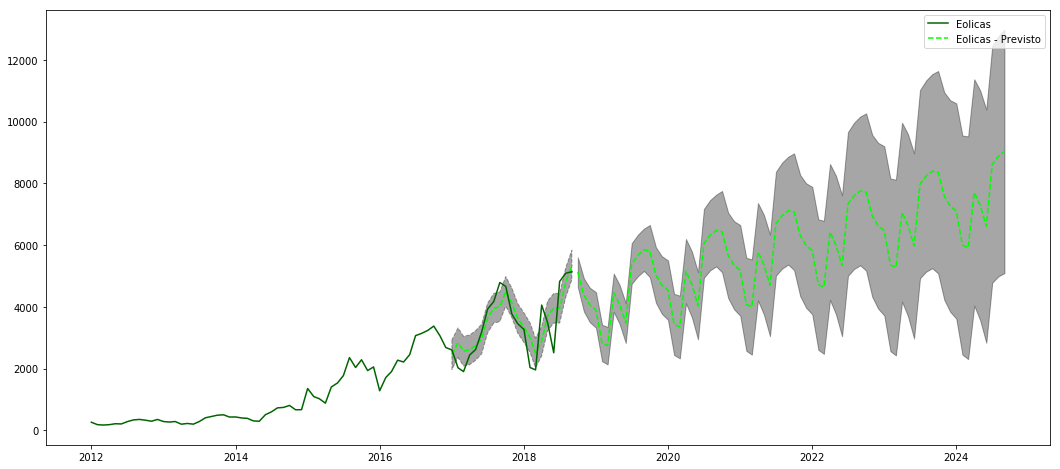

In [72]:
plot_predict(3,show_ci=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


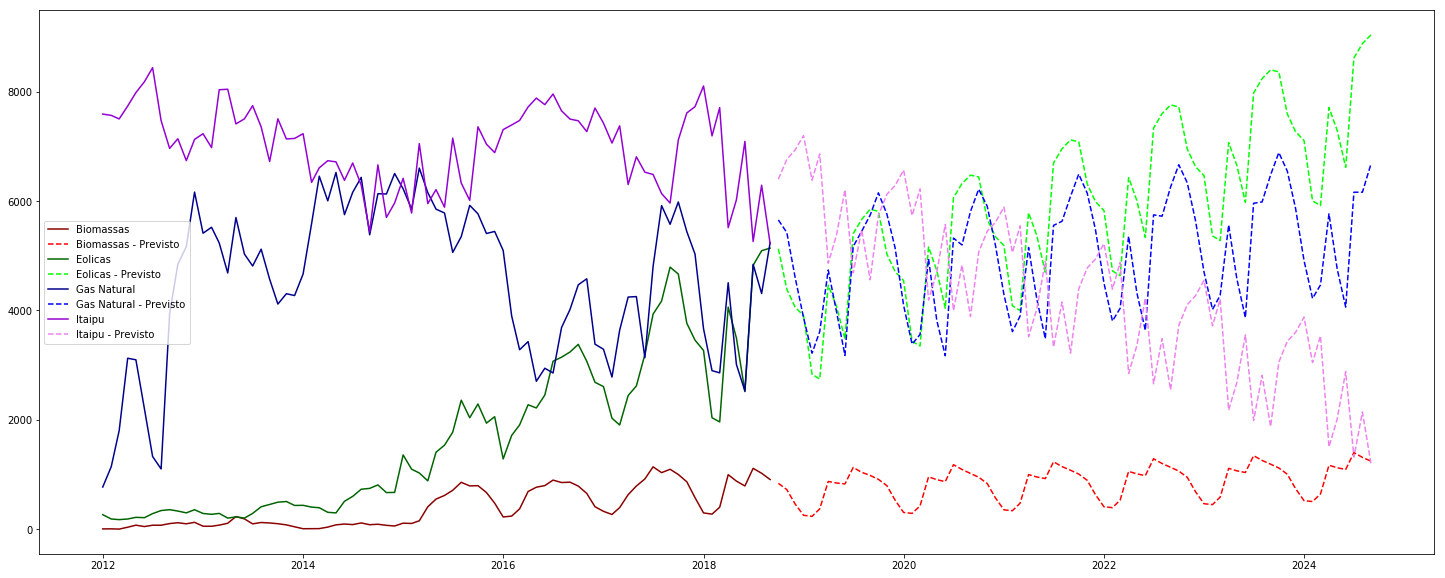

In [77]:
plt.figure(figsize=(25,10))
for index, row in legend.iterrows():
    if index not in [5,9,8,1,2,7]:
        plot_predict(index)